In [2]:
import requests
from bs4 import BeautifulSoup
import re
from time import sleep

In [3]:
url = 'https://www.logic-immo.be/fr/recherche/immobilier-vente/appartement-a-vendre/bruxelles-capitale'
headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 5.1.1; SM-G98X Build/LMY47X)'}

communes = []
prices = []
sqrms = []
urls = []

page_nb = 20
for i in range(1, page_nb+1):
    page_url = url + '?page=' + str(i)
    page = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    results = soup.find_all("a", {"class": "property-card-list-component"})

    for j in range(20):
        try:
            communes.append(results[j].h3.text)
        except:
            communes.append("None")
        try:
            price_div = results[j].find("div", {"class": "price-component"})
            prices.append(int(re.sub("[^0-9]", "", str(price_div))))
        except:
            prices.append("None")

        try:
            sqrm_span = results[j].find('ul').find_all('li')[-1].span.text
            sqrms.append(int(re.sub("[^0-9]", "", str(sqrm_span))))
        except:
            sqrms.append("None")
        try:
            urls.append("https://www.logic-immo.be" + results[j]['href'])
        except:
            urls.append("None")
    sleep(30)

In [16]:
import pandas as pd
import numpy as np

print("Before Cleaning:")
df = pd.DataFrame({
    'communes': communes,
    'prices': prices,
    'sqrms': sqrms,
    'urls': urls
})

print(df.info())

print("_________________")
print("After Cleaning:")
df.replace('None', np.nan, inplace = True)
df = df.dropna()
df = df[df['prices']<1000000]
df = df[df['sqrms']>9]

print(df.info())
df.head(5)

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   communes  400 non-null    object
 1   prices    400 non-null    object
 2   sqrms     400 non-null    int64 
 3   urls      400 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB
None
_________________
After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   communes  372 non-null    object 
 1   prices    372 non-null    float64
 2   sqrms     372 non-null    int64  
 3   urls      372 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.5+ KB
None


,communes,prices,sqrms,urls
0,Uccle,395000.0,166,https://www.logic-immo.be/fr/annonce/vente/app...
1,Forest,800000.0,227,https://www.logic-immo.be/fr/annonce/vente/app...
2,Koekelberg,380000.0,120,https://www.logic-immo.be/fr/annonce/vente/app...
3,Uccle,325000.0,96,https://www.logic-immo.be/fr/annonce/vente/app...
4,Uccle,609000.0,132,https://www.logic-immo.be/fr/annonce/vente/app...


Text(0.5, 1.0, 'Distribution of prices')

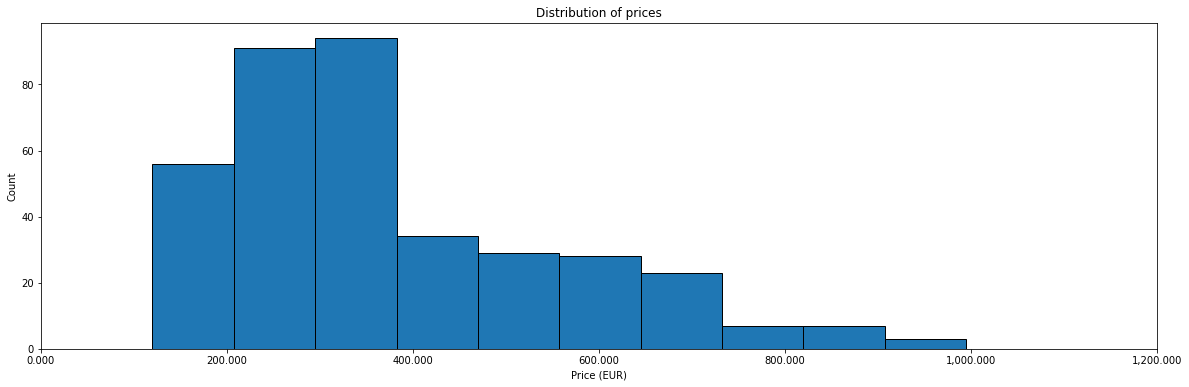

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.hist(df['prices'], edgecolor='black')
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_xticklabels(['{:,.3f}'.format(x) for x in plt.gca().get_xticks()/1000])
plt.xlabel("Price (EUR)")
plt.ylabel('Count')
plt.title("Distribution of prices")

,prices,sqrms
prices,1.000000,0.808461
sqrms,0.808461,1.000000


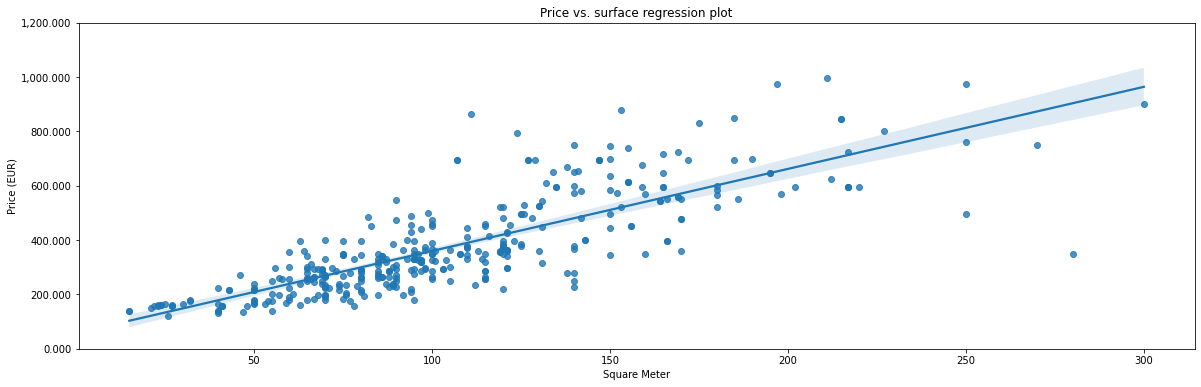

In [18]:
import matplotlib.pylab as pylab
import seaborn as sns

plt.figure(figsize=(20, 6))
g = sns.regplot(x='sqrms', y='prices', data=df)
ylabels = ['{:,.3f}'.format(y) for y in g.get_yticks()/1000]
g.yaxis.set_ticks(g.get_yticks())
g.set_yticklabels(ylabels)
plt.title('Price vs. surface regression plot')
plt.xlabel("Square Meter")
plt.ylabel("Price (EUR)")
df.corr()

Text(0.5, 1.0, 'Prices by municipality - Boxplots')

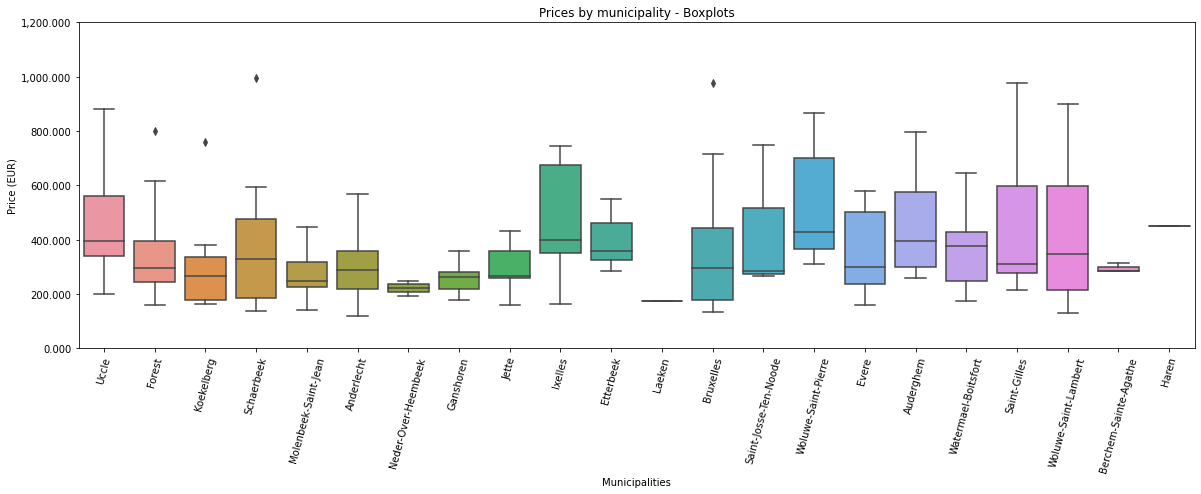

In [20]:
plt.figure(figsize=(20, 6))
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 6),
        }
pylab.rcParams.update(params)
g = sns.boxplot(x='communes', y='prices', data=df)
ylabels = ['{:,.3f}'.format(y) for y in g.get_yticks()/1000]
g.yaxis.set_ticks(g.get_yticks())
g.set_yticklabels(ylabels)
plt.xlabel("Municipalities")
plt.xticks(rotation=75)
plt.ylabel("Price (EUR)")
plt.title("Prices by municipality - Boxplots")


In [189]:
df.groupby('communes').mean()['prices'].sort_values()

communes
Laeken                   175000.000000
Neder-Over-Heembeek      221500.000000
Ganshoren                258833.333333
Molenbeek-Saint-Jean     262360.000000
Jette                    294673.000000
Berchem-Sainte-Agathe    295000.000000
Anderlecht               300805.555556
Koekelberg               317000.000000
Bruxelles                332353.448276
Watermael-Boitsfort      351454.545455
Evere                    353445.187500
Forest                   355052.631579
Schaerbeek               359739.130435
Etterbeek                394427.142857
Woluwe-Saint-Lambert     415642.857143
Saint-Josse-Ten-Noode    433333.333333
Saint-Gilles             442800.000000
Auderghem                448772.727273
Haren                    450000.000000
Uccle                    455767.441860
Ixelles                  475402.439024
Woluwe-Saint-Pierre      536000.000000
Name: prices, dtype: float64